In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Dataset_maternal_mental_health_infant_sleep.csv', encoding='latin-1', sep=';')

/home/irina/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (6,61) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
k = ['Type_parents', 'Birth_1mth_M_inclusion',
       'Birth_12mth_M_inclusion', 'Age', 'Marital_status', 'Marital_status_edit', 'Education',
       'Gestationnal_age', 'Type_pregnancy', 'sex_baby1', 'CBTS_M_3',
       'CBTS_M_4', 'CBTS_M_5', 'CBTS_M_6', 'CBTS_M_7', 'CBTS_M_8', 'CBTS_M_9',
       'CBTS_M_10', 'CBTS_M_11', 'CBTS_M_12', 'CBTS_13', 'CBTS_14', 'CBTS_15',
       'CBTS_16', 'CBTS_17', 'CBTS_18', 'CBTS_19', 'CBTS_20', 'CBTS_21',
       'CBTS_22', 'EPDS_1', 'EPDS_2', 'EPDS_3', 'EPDS_4', 'EPDS_5', 'EPDS_6',
       'EPDS_7', 'EPDS_8', 'EPDS_9', 'EPDS_10', 'HADS_1', 'HADS_3', 'HADS_5',
       'HADS_7', 'HADS_9', 'HADS_11', 'HADS_13', 'Child_survey_participation',
       'Age_bb']
#      'IBQ_R_VSF_3_bb1', 'IBQ_R_VSF_4_bb1', 'IBQ_R_VSF_9_bb1',
#        'IBQ_R_VSF_10_bb1', 'IBQ_R_VSF_16_bb1', 'IBQ_R_VSF_17_bb1',
#        'IBQ_R_VSF_28_bb1', 'IBQ_R_VSF_29_bb1', 'IBQ_R_VSF_32_bb1',
#        'IBQ_R_VSF_33_bb1', 'how_falling_asleep_bb1']

In [5]:
df = df.dropna(subset=k)

In [6]:
X = df[['Type_parents', 'Birth_1mth_M_inclusion',
       'Birth_12mth_M_inclusion', 'Age', 'Marital_status', 'Marital_status_edit', 'Education',
       'Gestationnal_age', 'Type_pregnancy', 'sex_baby1', 'CBTS_M_3',
       'CBTS_M_4', 'CBTS_M_5', 'CBTS_M_6', 'CBTS_M_7', 'CBTS_M_8', 'CBTS_M_9',
       'CBTS_M_10', 'CBTS_M_11', 'CBTS_M_12', 'CBTS_13', 'CBTS_14', 'CBTS_15',
       'CBTS_16', 'CBTS_17', 'CBTS_18', 'CBTS_19', 'CBTS_20', 'CBTS_21',
       'CBTS_22', 'EPDS_1', 'EPDS_2', 'EPDS_3', 'EPDS_4', 'EPDS_5', 'EPDS_6',
       'EPDS_7', 'EPDS_8', 'EPDS_9', 'EPDS_10', 'HADS_1', 'HADS_3', 'HADS_5',
       'HADS_7', 'HADS_9', 'HADS_11', 'HADS_13', 'Child_survey_participation',
       'Age_bb']]
#         'IBQ_R_VSF_3_bb1', 'IBQ_R_VSF_4_bb1', 'IBQ_R_VSF_9_bb1',
#        'IBQ_R_VSF_10_bb1', 'IBQ_R_VSF_16_bb1', 'IBQ_R_VSF_17_bb1',
#        'IBQ_R_VSF_28_bb1', 'IBQ_R_VSF_29_bb1', 'IBQ_R_VSF_32_bb1',
#        'IBQ_R_VSF_33_bb1']]
y = df['how_falling_asleep_bb1']

<AxesSubplot:>

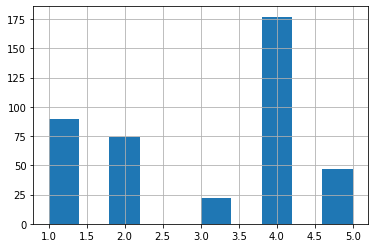

In [7]:
df['how_falling_asleep_bb1'].hist()

In [8]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                   stratify=y)

In [10]:
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [11]:
y_pred = clf.predict(X_test)

In [12]:
accuracy_score(y_pred, y_test)

0.43902439024390244

In [13]:
confusion_matrix(y_pred, y_test)

array([[ 2,  2,  0,  1,  0],
       [ 0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0],
       [16, 13,  4, 34,  9],
       [ 0,  0,  0,  0,  0]])

In [14]:
y_pred

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 1., 4., 4., 4., 4., 4., 4., 4., 4., 4., 1., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 1., 4., 4., 1., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 2., 4., 4., 4., 4., 4., 4., 1., 4., 4., 4.])

In [15]:
y_test

154    3.0
272    1.0
165    4.0
223    3.0
299    5.0
      ... 
354    1.0
381    4.0
350    3.0
221    2.0
187    4.0
Name: how_falling_asleep_bb1, Length: 82, dtype: float64

In [16]:
y_train

46     2.0
196    1.0
284    5.0
99     4.0
282    3.0
      ... 
143    3.0
106    3.0
368    4.0
256    2.0
374    2.0
Name: how_falling_asleep_bb1, Length: 328, dtype: float64

## Save model

In [17]:
import joblib
joblib.dump(clf, 'baseline_pipline.pkl')

['baseline_pipline.pkl']

In [19]:
# example for reading pipline

clf_model = joblib.load('baseline_pipline.pkl')